In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
# No null value present in columns

In [8]:
print(df.shape)
print(df.columns)
type(df)

(200, 5)
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


pandas.core.frame.DataFrame

In [9]:
# Here, 1st column-Unnamed is not usefull, so remeve it.

In [10]:
df = df.drop(columns='Unnamed: 0', axis=0)

In [11]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
# checking outliers

C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


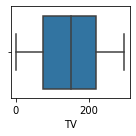

In [15]:
fig = plt.subplots(1, figsize = (2,2))
plt1 = sns.boxplot(df['TV'])

plt.tight_layout()

C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


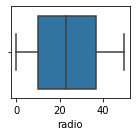

In [16]:
fig = plt.subplots(1, figsize = (2,2))
plt1 = sns.boxplot(df['radio'])

plt.tight_layout()

C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


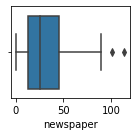

In [17]:
fig = plt.subplots(1, figsize = (2,2))
plt1 = sns.boxplot(df['newspaper'])

plt.tight_layout()

In [18]:
#there are no considerable outliers present 

In [19]:
#see how Sales are related with other variables using scatter plot.

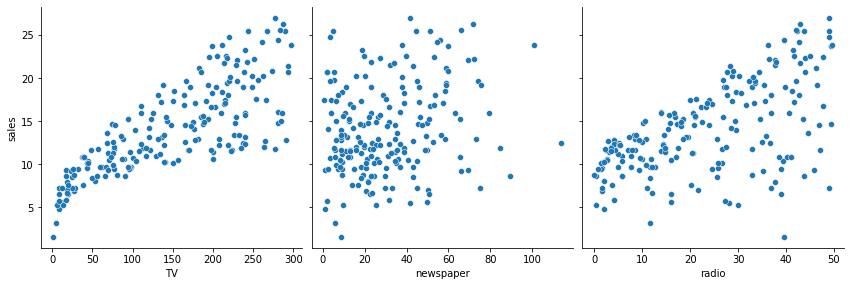

In [20]:
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

In [21]:
#lets check corelation 

In [22]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [23]:
# using heatmap

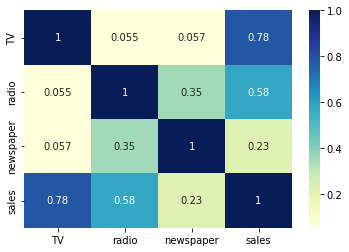

In [24]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [25]:
#from map conclude that TV is more correlated with Sales.

# Model Building

In [26]:
# Simple Linear Regression

In [27]:
X = df['TV']
y = df['sales']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [30]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [31]:
import statsmodels.api as sm

In [32]:
X_train_sm = sm.add_constant(X_train)

C:\Users\Prachi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
lnr = sm.OLS(y_train,X_train_sm).fit()

In [34]:
lnr.params

const    6.989666
TV       0.046497
dtype: float64

In [35]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           2.84e-30
Time:                        13:51:35   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

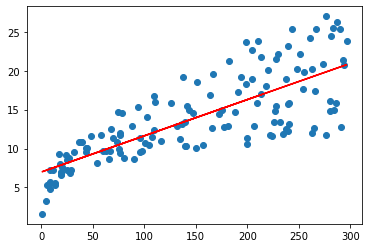

In [37]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9897 + 0.0465 * X_train, 'r')
plt.show()

In [38]:
# residual analysis and distribution of errors

In [39]:
y_train_pred = lnr.predict(X_train_sm)
resid = (y_train - y_train_pred)
resid

74     0.087798
3      4.465984
185    6.078376
26     1.365862
90    -2.034261
         ...   
87     3.863077
103   -1.026520
67    -0.066748
24    -0.186451
8     -2.589543
Length: 140, dtype: float64

C:\Users\Prachi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


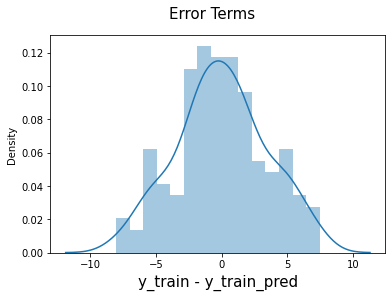

In [40]:
fig = plt.figure()
sns.distplot(resid,bins = 15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

In [41]:
# Prediction on Test dataSet

In [42]:
X_test_sm = sm.add_constant(X_test)
y_pred = lnr.predict(X_test_sm)

C:\Users\Prachi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.8241456288327016

In [46]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.59429872677833

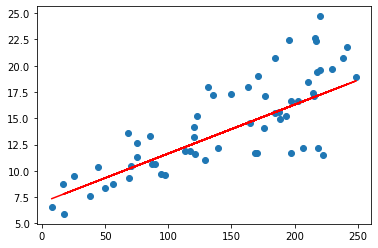

In [47]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.9897 + 0.0465 * X_test, 'r')
plt.show()

In [ ]:
From all these operation conclude that TV and radio are more effective than newspaper.